<a href="https://colab.research.google.com/github/dzeaulfath/Python/blob/main/RFM%20and%20Prophet%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic Library
import numpy as np
import pandas as pd

#Statistic library
from statsmodels.tsa.stattools import adfuller
import scipy

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Forecasting Library
from fbprophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime as dt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importing Dataset

!wget -O supermarket.csv https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/supermarket_sales%20-%20Sheet1.csv

--2021-10-17 13:53:59--  https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/supermarket_sales%20-%20Sheet1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131528 (128K) [text/plain]
Saving to: ‘supermarket.csv’

supermarket.csv     100%[===================>] 128.45K  --.-KB/s    in 0.002s  

2021-10-17 13:53:59 (54.0 MB/s) - ‘supermarket.csv’ saved [131528/131528]



In [ ]:
#Showing Data

df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
  #For Search duplicate Row

  df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#Merubah Tipe data 'Date' dari menjadi Date 

df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
index_cogs = df[df['cogs'] > 3 * df['cogs'].std() + 100 ].index
data_clean = df.drop(index_cogs, axis=0)

In [ ]:
df.info

<bound method DataFrame.info of       Invoice ID Branch  ... gross income Rating
0    750-67-8428      A  ...      26.1415    9.1
1    226-31-3081      C  ...       3.8200    9.6
2    631-41-3108      A  ...      16.2155    7.4
3    123-19-1176      A  ...      23.2880    8.4
4    373-73-7910      A  ...      30.2085    5.3
..           ...    ...  ...          ...    ...
995  233-67-5758      C  ...       2.0175    6.2
996  303-96-2227      B  ...      48.6900    4.4
997  727-02-1313      A  ...       1.5920    7.7
998  347-56-2442      A  ...       3.2910    4.1
999  849-09-3807      A  ...      30.9190    6.6

[1000 rows x 17 columns]>

In [ ]:
data_clean = data_clean.sort_values(by='Date').reset_index(drop=True)

In [ ]:
data_clean

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39,Credit card,435.66,4.761905,21.783,6.9
1,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
2,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,11:40,Ewallet,175.32,4.761905,8.766,5.0
3,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
4,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
956,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4
957,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.008,609.168,2019-03-30,19:26,Credit card,580.16,4.761905,29.008,4.0
958,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,2019-03-30,16:34,Cash,186.80,4.761905,9.340,5.5


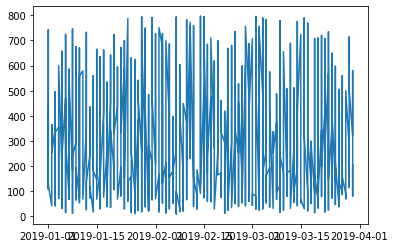

In [ ]:
plt.plot(data_clean['Date'], data_clean['cogs'])

In [ ]:
# Pengujian AdFuller

adfuller(data_clean['cogs'])

(-30.38699236662675,
 0.0,
 0,
 959,
 {'1%': -3.43718721587049,
  '10%': -2.568377225331392,
  '5%': -2.8645585177815187},
 12653.73788148212)

In [ ]:
data_clean['cogs'] = data_clean['cogs'].diff()
data_clean = data_clean.drop(0, axis=0)

In [ ]:
data_clean.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
adfuller(data_clean['cogs'])

(-11.968855029498762,
 3.941529920675653e-22,
 20,
 938,
 {'1%': -3.4373407098114765,
  '10%': -2.568413277899264,
  '5%': -2.8646262040163566},
 12710.540352124046)

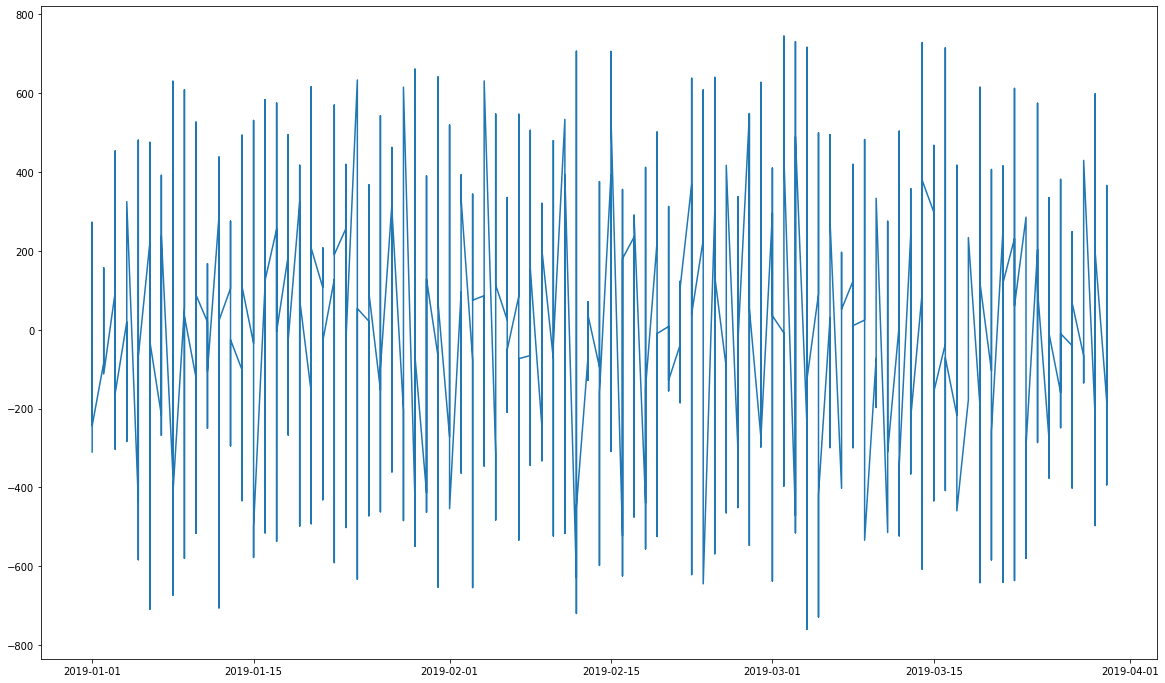

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(data_clean['Date'].sort_values(), data_clean['cogs'])

# SARIMAX PREDICTION

In [ ]:
m  = SARIMAX(data_clean['cogs'], order = (3, 1, 3), seasonal_order=(3, 1, 3, 6))
res = m.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                              cogs   No. Observations:                  959
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 6)   Log Likelihood               -6690.840
Date:                           Sun, 17 Oct 2021   AIC                          13407.679
Time:                                   13:54:29   BIC                          13470.840
Sample:                                        0   HQIC                         13431.742
                                           - 959                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0512      0.411     -2.560      0.010      -1.856      -0.246
ar.L2         -0.0973      0.159     -0.612      0.541      -0.409       0.215
ar.L3         -0.0446      0.115     -0.387      0.699      -0.271       0.181
ma.L1         -0.9980     16.379     -0.061      0.951     -33.100      31.104
ma.L2         -0.9999     32.700     -0.031      0.976     -65.091      63.091
ma.L3          0.9980     16.325      0.061      0.951     -30.998      32.995
ar.S.L6       -1.9166      0.162    -11.860      0.000      -2.233      -1.600
ar.S.L12      -0.8946      0.254     -3.523      0.000      -1.392      -0.397
ar.S.L18       0.0511      0.111      0.460      0.646      -0.167       0.269
ma.S.L6        0.9642     15.978      0.060      0.952     -30.352      32.281
ma.S.L12      -0.9732     31.370     -0.031      0.975     -62.457      60.510
ma.S.L18      -0.9910     15.821     -0.063      0.950     -32.000      30.018
sigma2      1.393e+05      0.001   2.43e+08      0.000    1.39e+05    1.39e+05
===================================================================================
Ljung-Box (Q):                       51.09   Jarque-Bera (JB):                82.98
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.69
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.58e+27. Standard errors may be unstable.
"""

In [ ]:
data_clean['arima_predict'] = res.fittedvalues

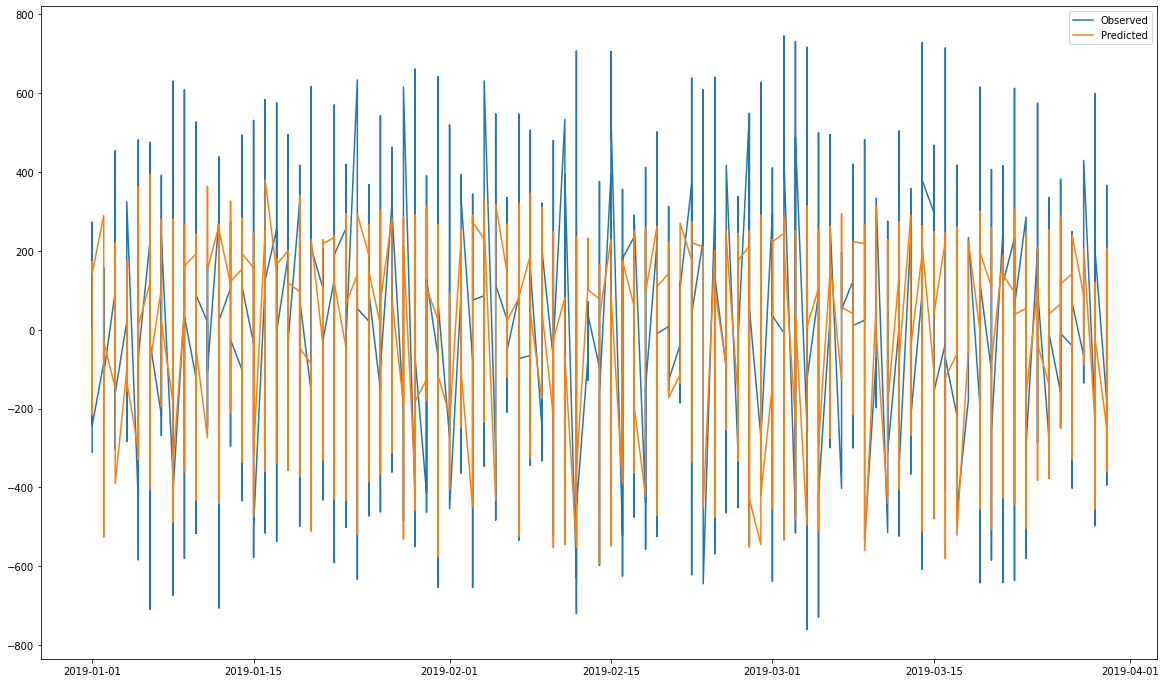

In [ ]:
#One Step Ahead Forecasting

plt.figure(figsize=(20, 12))
plt.plot(data_clean['Date'].sort_values(), data_clean['cogs'], label= 'Observed')
plt.plot(data_clean['Date'].sort_values(), data_clean['arima_predict'], label= 'Predicted')
plt.legend()

In [ ]:
forecast = res.predict(start=len(data_clean), end=len(data_clean) + 15)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
forecast

959    41.016992
960    21.076288
961     7.617361
962     5.280759
963   -39.094343
964    24.134276
965     1.005940
966     2.050126
967    11.254910
968    24.025433
969   -64.013261
970    51.778912
971   -59.427379
972    38.311172
973    -6.091249
974     1.521103
dtype: float64

In [ ]:
len(data_clean['arima_predict'])

959

In [ ]:
data_clean['cogs'].append(forecast)

1     -309.920000
2       49.580000
3      -67.160000
4      272.560000
5      210.940000
          ...    
970     51.778912
971    -59.427379
972     38.311172
973     -6.091249
974      1.521103
Length: 975, dtype: float64

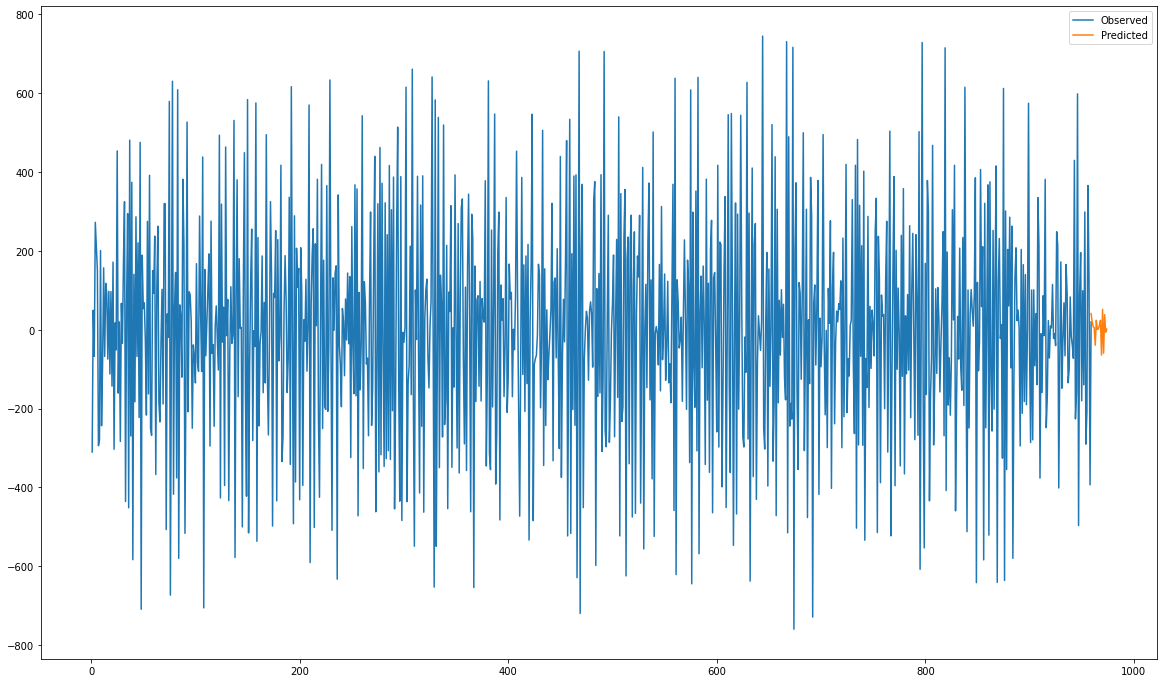

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(data_clean['cogs'], label= 'Observed')
plt.plot(forecast, label= 'Predicted')

plt.legend()

# PROPHET PREDICTION


In [ ]:
data_clean = df.drop(index_cogs, axis=0)

In [ ]:
p = Prophet()
d = data_clean.rename(columns={'Date':'ds', 'cogs':'y'})

In [ ]:
p.fit(d)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
d

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,ds,Time,Payment,y,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Memprediksi dalam timeframe 15 hari

future = p.make_future_dataframe(periods=15, freq='D')
future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
99,2019-04-10
100,2019-04-11
101,2019-04-12
102,2019-04-13


In [ ]:
forecats = p.predict(future)
forecats

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,295.222351,38.119843,562.178766,295.222351,295.222351,0.720594,0.720594,0.720594,0.720594,0.720594,0.720594,0.0,0.0,0.0,295.942945
1,2019-01-02,294.958285,23.879330,525.642220,294.958285,294.958285,-23.627462,-23.627462,-23.627462,-23.627462,-23.627462,-23.627462,0.0,0.0,0.0,271.330822
2,2019-01-03,294.694218,51.854317,561.572851,294.694218,294.694218,17.754915,17.754915,17.754915,17.754915,17.754915,17.754915,0.0,0.0,0.0,312.449134
3,2019-01-04,294.430151,25.064880,547.593617,294.430151,294.430151,-23.274652,-23.274652,-23.274652,-23.274652,-23.274652,-23.274652,0.0,0.0,0.0,271.155500
4,2019-01-05,294.166085,36.924576,565.400783,294.166085,294.166085,9.614487,9.614487,9.614487,9.614487,9.614487,9.614487,0.0,0.0,0.0,303.780572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2019-04-10,269.123589,-13.702803,522.498243,269.123264,269.123996,-23.627462,-23.627462,-23.627462,-23.627462,-23.627462,-23.627462,0.0,0.0,0.0,245.496127
100,2019-04-11,268.860044,49.971418,545.444652,268.859674,268.860513,17.754915,17.754915,17.754915,17.754915,17.754915,17.754915,0.0,0.0,0.0,286.614960
101,2019-04-12,268.596500,-31.949490,509.368426,268.596061,268.597033,-23.274652,-23.274652,-23.274652,-23.274652,-23.274652,-23.274652,0.0,0.0,0.0,245.321848
102,2019-04-13,268.332955,-0.678570,545.565602,268.332464,268.333546,9.614487,9.614487,9.614487,9.614487,9.614487,9.614487,0.0,0.0,0.0,277.947442


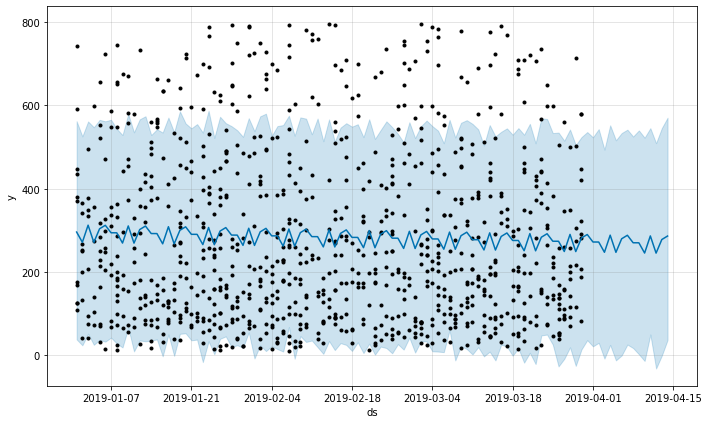

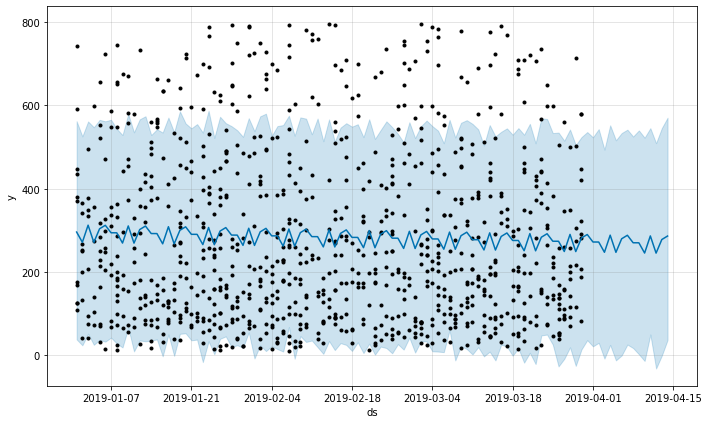

In [ ]:
p.plot(forecats, uncertainty=True)

In [ ]:
forecats[-15:]['yhat']

89     290.042475
90     272.024169
91     271.952540
92     247.340939
93     288.459772
94     247.166661
95     279.792255
96     288.197662
97     270.179357
98     270.107727
99     245.496127
100    286.614960
101    245.321848
102    277.947442
103    286.352850
Name: yhat, dtype: float64

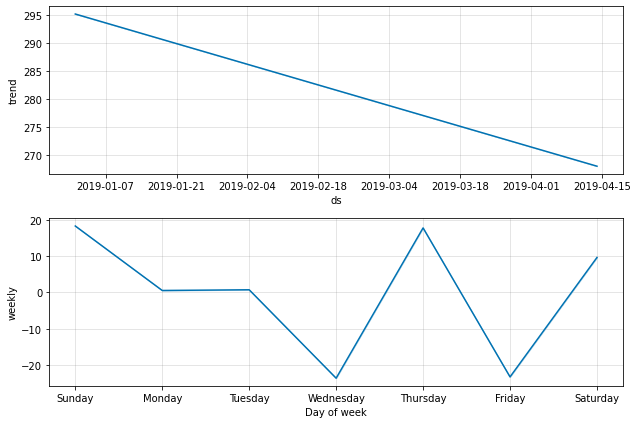

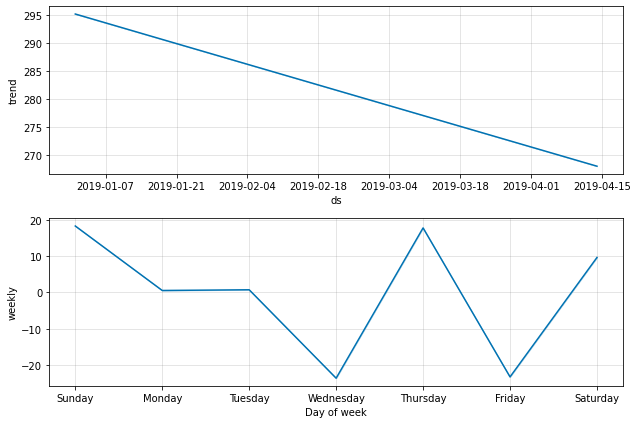

In [ ]:
p.plot_components(forecats)

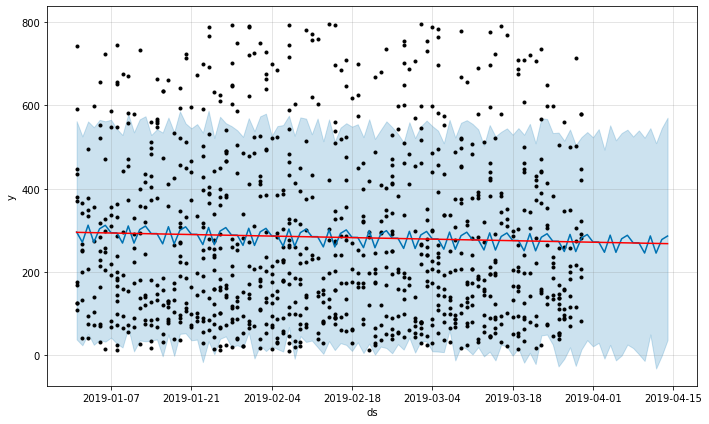

In [ ]:
# Mendeteksi change point pada prophet

from fbprophet.plot import add_changepoints_to_plot
fig = p.plot(forecats)
a = add_changepoints_to_plot(fig.gca(), p, forecats)

Bisa dilihat bahwa pada garis merah merupkan change point, dan pada tabel tersebut tidak ada change point yang terjadi

# RFM


R: Last Buy

F: How Many Times Buy In Last Year

M: ToTal Sale

In [ ]:
data_clean['Date'] = pd.to_datetime(data_clean['Date'])

In [ ]:
max(data_clean['Date'])

Timestamp('2019-03-30 00:00:00')

In [ ]:
pin_date = max(data_clean['Date']) + dt.timedelta(1)
pin_date

Timestamp('2019-03-31 00:00:00')

In [ ]:
data_clean.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,960.000000,960.000000,960.000000,960.000000,960.000000,9.600000e+02,960.000000,960.000000
mean,54.156146,5.337500,14.172479,297.622052,283.449573,4.761905e+00,14.172479,6.976458
std,25.924642,2.854601,10.297165,216.240459,205.943294,6.131625e-14,10.297165,1.715016
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,31.885000,3.000000,5.654250,118.739250,113.085000,4.761905e+00,5.654250,5.500000
50%,53.255000,5.000000,11.404500,239.494500,228.090000,4.761905e+00,11.404500,7.000000
75%,75.410000,8.000000,21.029250,441.614250,420.585000,4.761905e+00,21.029250,8.500000
max,99.960000,10.000000,39.824000,836.304000,796.480000,4.761905e+00,39.824000,10.000000


In [ ]:
rfm = data_clean.groupby('Invoice ID').agg({
    'Date': lambda x: (pin_date - x.max()).days,
    'Invoice ID': 'count',
    'cogs': 'sum'
})

In [ ]:
rfm.rename(columns={'Invoice ID': 'count buy', 'cogs': 'total_sale', 'Date': 'Last_buy(days)' }, inplace=True)

In [ ]:
rfm

,Last_buy(days),count buy,total_sale
Invoice ID,,,
101-17-6199,18,1,320.53
101-81-4070,73,1,125.64
102-06-2002,11,1,126.25
102-77-2261,26,1,457.17
105-10-6182,32,1,42.96
...,...,...,...
894-41-5205,71,1,345.44
895-03-6665,43,1,328.59
895-66-0685,26,1,54.24


In [ ]:
r = pd.qcut(rfm['Last_buy(days)'], 3, labels = range(3, 0, -1))
#f = pd.qcut(rfm['count buy'], 3, labels = range(3, 0, -1))
m = pd.qcut(rfm['total_sale'], 3, labels = range(0, 3))

In [ ]:
rfm['R'] = r
rfm['M'] = m

In [ ]:
rfm

,Last_buy(days),count buy,total_sale,R,M
Invoice ID,,,,,
101-17-6199,18,1,320.53,3,1
101-81-4070,73,1,125.64,1,0
102-06-2002,11,1,126.25,3,0
102-77-2261,26,1,457.17,3,2
105-10-6182,32,1,42.96,2,0
...,...,...,...,...,...
894-41-5205,71,1,345.44,1,2
895-03-6665,43,1,328.59,2,1
895-66-0685,26,1,54.24,3,0


In [ ]:
x = rfm.iloc[:, -2:]
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label = km.labels_
rfm['Rank'] = label
rfm

,Last_buy(days),count buy,total_sale,R,M,Rank
Invoice ID,,,,,,
101-17-6199,18,1,320.53,3,1,0
101-81-4070,73,1,125.64,1,0,1
102-06-2002,11,1,126.25,3,0,0
102-77-2261,26,1,457.17,3,2,2
105-10-6182,32,1,42.96,2,0,3
...,...,...,...,...,...,...
894-41-5205,71,1,345.44,1,2,4
895-03-6665,43,1,328.59,2,1,3
895-66-0685,26,1,54.24,3,0,0


In [ ]:
print(km.inertia_)
print('')

211.0178049202916



In [ ]:
score = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100)
    km.fit(x)
    score.append(km.inertia_)

Text(0.5, 1.0, 'Elbow')

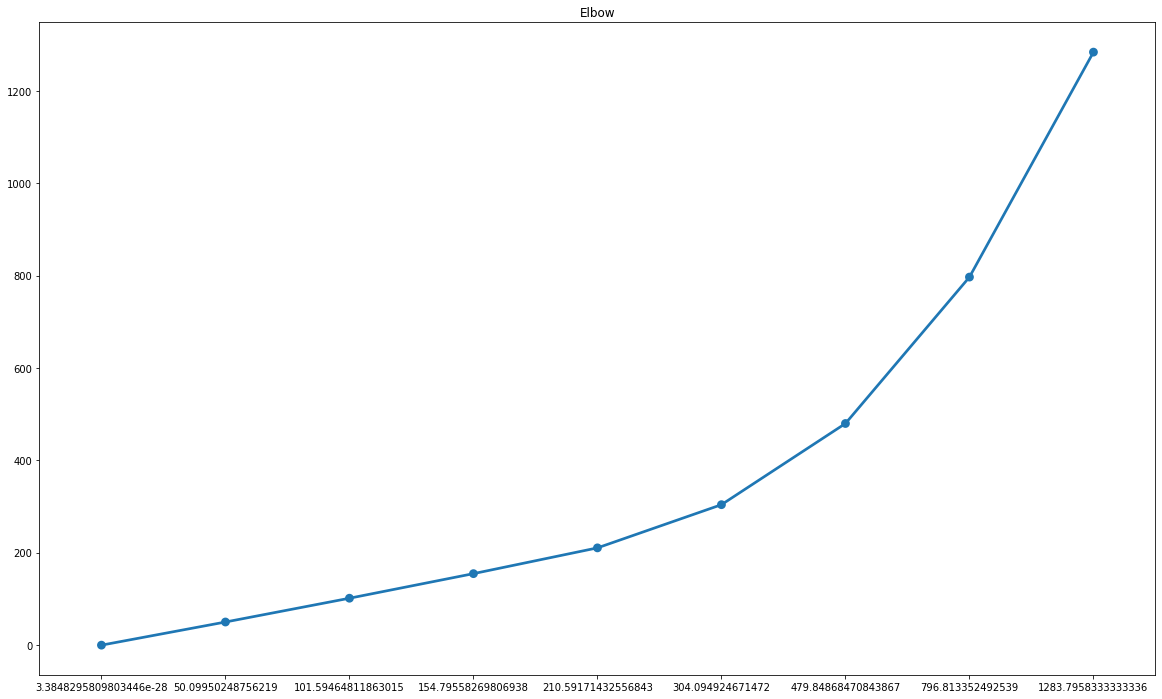

In [ ]:
plt.figure(figsize=(20, 12))
sns.pointplot(x = score, y = score)
plt.title('Elbow')